In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gdown
import joblib

#Downloading the dataset from gdrive
file_id = "1mbq2a-79HB2oaNx1kSaiMoGMtbfUT4ng"
url = f"https://drive.google.com/uc?id={file_id}"
output = "rock_vs_mine.csv"

#Downloading dataset if not already present
if not os.path.exists(output):
    gdown.download(url, output, quiet=False)
else:
    print("Dataset already downloaded.")

#Loading the dataset
df = pd.read_csv('rock_vs_mine.csv', header = None)
print(df.head())

Dataset already downloaded.
       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.004

In [43]:
#checking the label distribution
print(df.iloc[:, -1].value_counts())

# print(df.describe())

60
M    111
R     97
Name: count, dtype: int64


In [44]:
#grouping data by label and computing mean
df.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [45]:
#Splitting dataset into features and target
X = df.drop(columns = 60, axis = 1)
y = df[60]
print(X)
print(y)

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, random_state= 42)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

In [46]:
#Scaling the features(data preprocessing)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Training the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [47]:
#Accuracy on training data
train_pred = model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, train_pred)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")

Training Accuracy: 90.91%


In [48]:
#Accuracy on test data
test_pred= model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")

Testing Accuracy: 85.71%


Confusion Matrix:


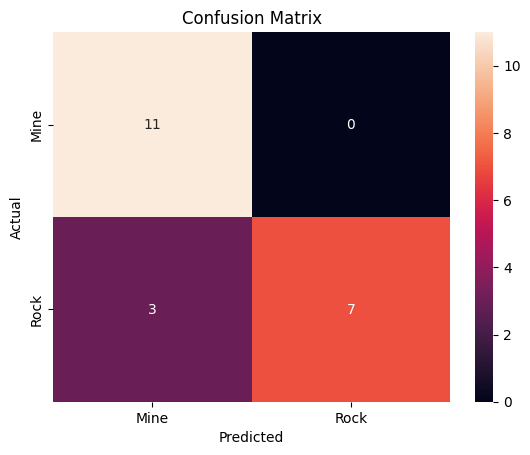


Classification Report:
              precision    recall  f1-score   support

           M       0.79      1.00      0.88        11
           R       1.00      0.70      0.82        10

    accuracy                           0.86        21
   macro avg       0.89      0.85      0.85        21
weighted avg       0.89      0.86      0.85        21



In [54]:
#Confusion Matrix and Classification Report
print("Confusion Matrix:")
cm = confusion_matrix(y_test, test_pred)
sns.heatmap(cm, annot=True, xticklabels=["Mine", "Rock"], yticklabels=["Mine", "Rock"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Printing classification report for precision, recall, F1-score
print("\nClassification Report:")
print(classification_report(y_test, test_pred))


In [50]:
#Testing with new data
new_data = [0.0231,0.0315,0.0170,0.0226,0.0410,0.0116,0.0223,0.0805,0.2365,0.2461,0.2245,0.1520,0.1732,0.3099,0.4380,0.5595,0.6820,0.6164,0.6803,0.8435,0.9921,1.0000,0.7983,0.5426,0.3952,0.5179,0.5650,0.3042,0.1881,0.3960,0.2286,0.3544,0.4187,0.2398,0.1847,0.3760,0.4331,0.3626,0.2519,0.1870,0.1046,0.2339,0.1991,0.1100,0.0684,0.0303,0.0674,0.0785,0.0455,0.0246,0.0151,0.0125,0.0036,0.0123,0.0043,0.0114,0.0052,0.0091,0.0008,0.0092]
input_data = np.asarray(new_data).reshape(1, -1) #converting new data to 2D array
prediction = model.predict(input_data)
print(prediction)

#Output of the prediction
if(prediction[0]== 'R'):
  print("The object is a rock")
else:
  print("The object is a Mine")

['M']
The object is a Mine


In [51]:
#Saving the trained model
joblib.dump(model, 'rock_vs_mine_model.pkl')
print("Model saved to 'rock_vs_mine_model.pkl'")

Model saved to 'rock_vs_mine_model.pkl'
